In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv(
    'tmdb_5000_movies.csv')
df.head(1)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


### Очишаем Dafaframe

In [107]:
df = df[(df.revenue != 0) & (df.budget != 0) & (df.popularity >= 1)]

In [108]:
df_rate = df[['title', 'vote_average']]
df_rate.head()

,title,vote_average
0,Avatar,7.2
1,Pirates of the Caribbean: At World's End,6.9
2,Spectre,6.3
3,The Dark Knight Rises,7.6
4,John Carter,6.1


In [109]:
df1 = df_rate.sort_values('vote_average', ascending = False).head(10)
df2 = df1.sort_values('vote_average', ascending = True)

### Используем значение средней оценки и исходя из этого найдет топ лучших фильмо

Text(0.5, 1.0, 'Top 10 best films')

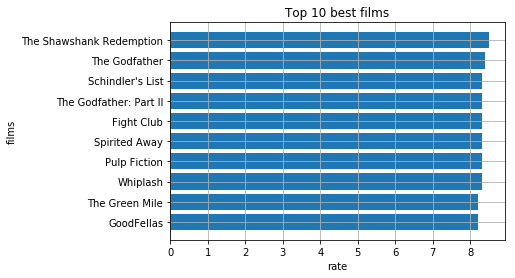

In [110]:
plt.barh(df2['title'], df2['vote_average'])
plt.grid()
plt.xlabel('rate')
plt.ylabel('films')
plt.title('Top 10 best films')

In [111]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year']= df['release_date'].dt.year

### Находим как увеличивалось число фильмов с каждым годом

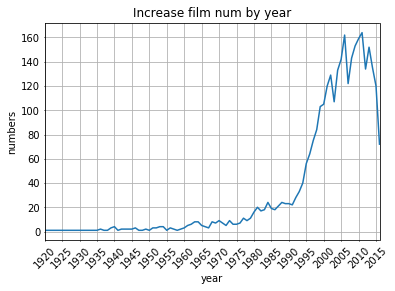

In [112]:
df_ct = df.groupby('year').count()['status'].reset_index()
plt.plot(df_ct['year'], df_ct['status'])
plt.grid()
plt.tick_params(length = 1)
plt.xlabel('year')
plt.ylabel('numbers')
plt.xlim([1920, 2016])
plt.xticks(range(1920,2016,5))
plt.title('Increase film num by year')
plt.tick_params(axis='x', labelrotation = 45)

#### Соотношение бюджета и сборов

([<matplotlib.axis.XTick at 0x9e0aac8>,
 <a list of 20 Text xticklabel objects>)

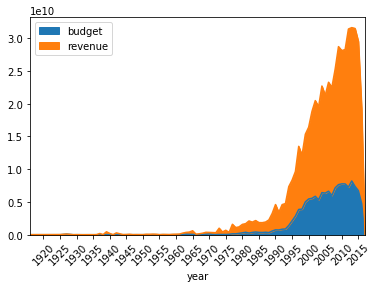

In [12]:
df_budget = df.groupby('year').sum()
df_budget_occupancy = df_budget[['budget','revenue']]
df_budget_occupancy.plot(kind='area', rot = 45)
plt.xticks(range(1920,2016,5))

#### Посмотрим на корреляцию сборов и оценок

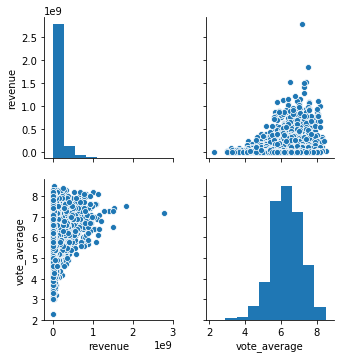

In [147]:
sns_plot = sns.pairplot(
    df[['revenue', 'vote_average']])
sns_plot

In [115]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [145]:
df_filt = df.filter(items = ['year', 'budget', 'revenue'])
df_year_budget = df_filt.groupby('year').sum().reset_index()
df_year_budget.head()

,year,budget,revenue
0,1916,385907,8394751
1,1927,92620000,650422
2,1930,3950000,8000000
3,1932,4,25
4,1933,439000,2281000


In [159]:
trace0 = go.Bar(
    x=df_year_budget['year'],
    y=df_year_budget['budget'],
    name='total budget by year'
)

trace1 = go.Bar(
    x=df_year_budget['year'],
    y=df_year_budget['revenue'],
    name='total revenue by year'
)
  
data = [trace0,trace1]
layout = {'title': 'The ratio of fees and budget'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)